# Continuous NMR analysis

## Task Summary

#### Measure $\gamma$ for protons
1. Import measurements of frequency and magnetic field taken multiple times (5-10) in order to establish uncertainty of individual measurements.  
2. Calculate the mean and standard deviation of each set of measurements.  Also calculate the percent uncetainty in each set. Use these results to establish uncertainties on the rest of the data points.
3. Import measurements of the resonant frequency $f_{\rm res}$ vs. static field $B_0$ for protons in water (+CuSO<sub>4</sub>) across the range of frequencies available with the oscillator.  
4. Include the uncertainty calculated in step 2.
5. Make a line fit and a plot of the data with the fit (use LMfit) to get the slope of $f_{\rm res}$ versus $B_0$.
6. Calculate $\gamma$ and the $g$-factor for the proton, including uncertainty.

#### Measure the resonance of <sup>19</sup>F versus <sup>1</sup>H
1. Import measurements listing measured B-field along with resonant frequencies of <sup>1</sup>H and <sup>19</sup>F at those field strengths.
2. Fit a line to the resonant frequency of <sup>19</sup>F versus resonant frequency of <sup>1</sup>H from the above data set, plot it (use LMfit) and obtain slope and its uncertainty.
3. From the results calculate $\gamma$ and associated $g$-factor for <sup>19</sup>F from the fit result and the accepted values known for <sup>1</sup>H.
4. Comment in your Group Notebook on the topic of observable chemical shift for fluorine

#### Trend of $T_2^*$ with paramagnetic ion concentration
If you can get quantitative values for how $T_2^*$ decays for a range of concentration, make a plot to see the trend.


In [1]:
# Import Packages

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import uncertainties as unc
import scipy.constants as const
%matplotlib inline

In [2]:
# Useful plot default
mpl.rcParams['figure.figsize'] = 12.0,8.0  # Roughly 12 cm wde by 8 cm high
mpl.rcParams['font.size'] = 14.0 # Use 14 point font

## Magnetic moment of the proton

### Read in the multi-measurement data

In [3]:
# Reads in the data to a Pandas dataframe.

nmr1_data = pd.read_csv('Continuous NMR Data - Exercise 1.csv')
print(nmr1_data)

    Freq(MHz)  Bo1 (kG)  Bo2 (kG)  Bo3 (kG)  Bo4 (kG)  Bo5 (kG)
0       6.406     1.486     1.486     1.486     1.486     1.486
1       6.910     1.604     1.604     1.604     1.604     1.604
2       7.406     1.720     1.720     1.720     1.720     1.720
3       7.907     1.838     1.838     1.838     1.838     1.838
4       8.401     1.953     1.953     1.953     1.953     1.953
5       8.908     2.072     2.072     2.072     2.072     2.072
6       9.409     2.190     2.190     2.190     2.190     2.190
7       9.900     2.305     2.305     2.305     2.305     2.305
8      10.407     2.424     2.424     2.424     2.424     2.424
9      10.903     2.539     2.539     2.539     2.539     2.539
10     11.409     2.658     2.658     2.658     2.658     2.658
11     11.900     2.773     2.773     2.773     2.773     2.773


In [4]:
# Calculates the frequency and magnetic field average and std.

freq = nmr1_data.iloc[:,0]

B0_avg = nmr1_data.iloc[:,1:].mean(axis=1)

B0_std = nmr1_data.iloc[:,1:].std(axis=1)

percent_unc = (B0_std/B0_avg) * 100

print(B0_std)
print(percent_unc)

0     0.000000e+00
1     2.482534e-16
2     0.000000e+00
3     2.482534e-16
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
dtype: float64
0     0.000000e+00
1     1.547715e-14
2     0.000000e+00
3     1.350671e-14
4     0.000000e+00
5     0.000000e+00
6     0.000000e+00
7     0.000000e+00
8     0.000000e+00
9     0.000000e+00
10    0.000000e+00
11    0.000000e+00
dtype: float64


### Read in the resonance data for protons

Use `read_csv()` as before.  You should have a table with at least 2 columns: resonance frequency and magnetic field. 

Print a table.

In [6]:
# Read in the data, and print the dataframe
print(freq)
print(B0_avg)

#Standard deviation about equal to the uncertainties so use instrumental instead

B0_unc = np.full_like(B0_avg, 0.0005)
print(B0_unc)

0      6.406
1      6.910
2      7.406
3      7.907
4      8.401
5      8.908
6      9.409
7      9.900
8     10.407
9     10.903
10    11.409
11    11.900
Name: Freq(MHz), dtype: float64
0     1.486
1     1.604
2     1.720
3     1.838
4     1.953
5     2.072
6     2.190
7     2.305
8     2.424
9     2.539
10    2.658
11    2.773
dtype: float64
[0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005 0.0005
 0.0005 0.0005]


In [7]:
# Constructs uncertainty arrays

#Inst. for instrumental
table = pd.DataFrame({'Frequency (MHz)':freq, 'B_0 (kG)':B0_avg,
                      'B_0 Inst. Uncertainty (kG)':B0_unc})
print(table)

    Frequency (MHz)  B_0 (kG)  B_0 Inst. Uncertainty (kG)
0             6.406     1.486                      0.0005
1             6.910     1.604                      0.0005
2             7.406     1.720                      0.0005
3             7.907     1.838                      0.0005
4             8.401     1.953                      0.0005
5             8.908     2.072                      0.0005
6             9.409     2.190                      0.0005
7             9.900     2.305                      0.0005
8            10.407     2.424                      0.0005
9            10.903     2.539                      0.0005
10           11.409     2.658                      0.0005
11           11.900     2.773                      0.0005


### Fit the data to extract the slope

Use LMfit.  See the examples.

In [8]:
# Set up the Model

# Import the Linear model.
# You only do this once in a notebook
from lmfit.models import LinearModel

# create an instance of the model
# You only need to do this once
line = LinearModel()

In [9]:
# Get starting parameters.  Example:
start_params = line.guess(B0_avg, x = freq)

# Feed these into the fitter and run it. Example:
Line_fit = line.fit(B0_avg, start_params, x = freq, weights = 1/B0_unc)

# Print the fit results. Example
print(Line_fit)

Text(0, 0.5, 'Magnetic field (kG)')

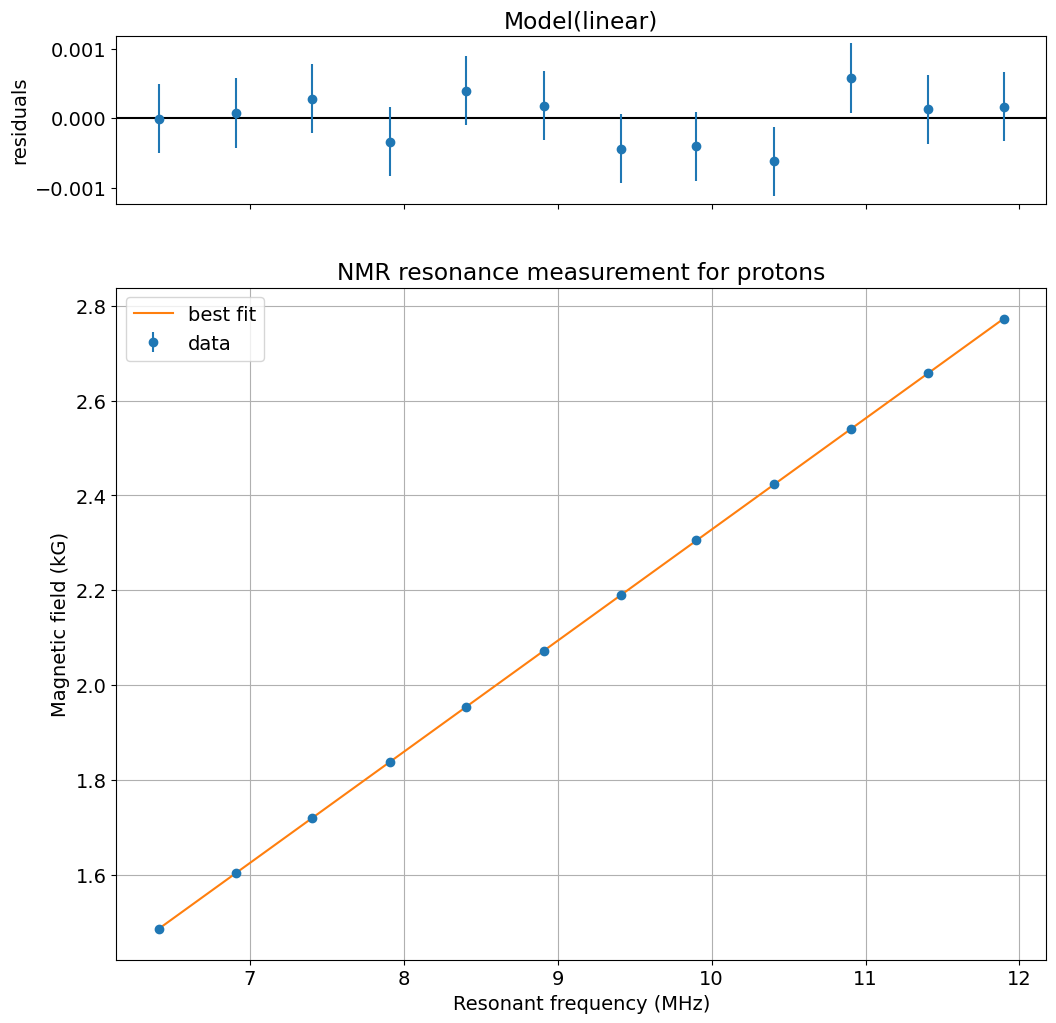

In [10]:
# Make a plot.  Example
Line_fit.plot()
plt.grid(True)
plt.title('NMR resonance measurement for protons')
plt.xlabel('Resonant frequency (MHz)')
plt.ylabel('Magnetic field (kG)')

### Extract the slope with uncertainty from the fit parameters


In [11]:
# Example

proton_slope = unc.ufloat(Line_fit.params['slope'].value, 
                          Line_fit.params['slope'].stderr,'proton_slope')

#Using the inverse of the slope as we conducted this portion of the lab reversed.
print('1/Proton Slope = {:.2uP} MHz/kG'.format(1/proton_slope))

1/Proton Slope = 4.2683±0.0012 MHz/kG


Calculate $\gamma$ in rad/(s-T) to compare to accepted values.  Use the conversion constants in `scipy.constants` 


In [61]:
# Here is an example of how to access the scipy.constants

expected_gamma = const.value('nuclear magneton') * const.value('proton g factor')
#Added line for pdf readability
expected_gamma = expected_gamma / const.hbar
print('Expected value of gamma for proton: {:.6g} rad/s/T'.format(expected_gamma))

#Unit conversion to rad/s/T
gamma_p = 2*np.pi*(1/proton_slope)*(1E6/1E3)*1E4
print('gamma for protons = {:.2uP} rad/s/T'.format(gamma_p))

Expected value of gamma for proton: 2.67522e+08 rad/s/T
gamma for protons = (2.68184±0.00075)×10⁸ rad/s/T


Calculate the proton $g$-factor from your result and compare to the expected value.

In [13]:
# You code this

g_factor_p = (2*const.proton_mass / const.elementary_charge) * gamma_p

print("g-factor for protons: {: .2uP}".format(g_factor_p))
print("Known proton g-factor:", const.value("proton g factor"))

g-factor for protons:  5.5995±0.0016
Known proton g-factor: 5.5856946893


## Fluorine-19 versus Proton (Hydrogen-1) resonance

### Read in the data

Also, print a table.

In [14]:
# Use pd.read_csv(), as you did earlier
nmr3_data = pd.read_csv('Continuous NMR Data - Exercise 3.csv')
print(nmr3_data)

   Bo (kG) approx.  H freq. (MHz)  Unnamed: 2  Unnamed: 3  F freq(MHz)  \
0            2.193         9.4288      9.4294      9.4295       8.8717   
1            2.483        10.6768     10.6747     10.6750      10.0440   
2            2.000         8.6108      8.6114      8.6108       8.1014   
3            1.800         7.7574      7.7584      7.7589       7.2999   
4            1.600         6.8999      6.9020      6.9023       6.4936   
5            1.500         6.4733      6.4742      6.4742       6.0904   

   Unnamed: 5  Unnamed: 6  Teflon freq (MHz)  
0      8.8719      8.8720             8.8723  
1     10.0434     10.0433            10.0413  
2      8.1023      8.1025                NaN  
3      7.3004      7.3004                NaN  
4      6.4945      6.4944                NaN  
5      6.0908      6.0908                NaN  


In [15]:
#Finding means and std to create table

B0 = nmr3_data.iloc[:,0]

Hfreq_avg = nmr3_data.iloc[:,1:4].mean(axis=1)

Hfreq_std = nmr3_data.iloc[:,1:4].std(axis=1)

Flfreq_avg = nmr3_data.iloc[:,4:7].mean(axis=1)

Flfreq_std = nmr3_data.iloc[:,4:7].std(axis=1)

res_df = pd.DataFrame({"B_0 (kG)":B0, "H frequency (MHz)":Hfreq_avg,
                       "H freq. stdev (MHz)":Hfreq_std, 
                       "F frequency (MHz)":Flfreq_avg, 
                       "F freq. stdev (MHz)":Flfreq_std})
print(res_df)

   B_0 (kG)  H frequency (MHz)  H freq. stdev (MHz)  F frequency (MHz)  \
0     2.193           9.429233             0.000379           8.871867   
1     2.483          10.675500             0.001136          10.043567   
2     2.000           8.611000             0.000346           8.102067   
3     1.800           7.758233             0.000764           7.300233   
4     1.600           6.901400             0.001308           6.494167   
5     1.500           6.473900             0.000520           6.090667   

   F freq. stdev (MHz)  
0             0.000153  
1             0.000379  
2             0.000586  
3             0.000289  
4             0.000493  
5             0.000231  


### Plot and fit the data.  

BUT: Here you are comparing the resonant frequencies only!  The magnetic field measurement does not matter, as long as it is stable between the two frequency measurements for each data point

Text(0, 0.5, 'Fluorine Resonant Frequency (MHz)')

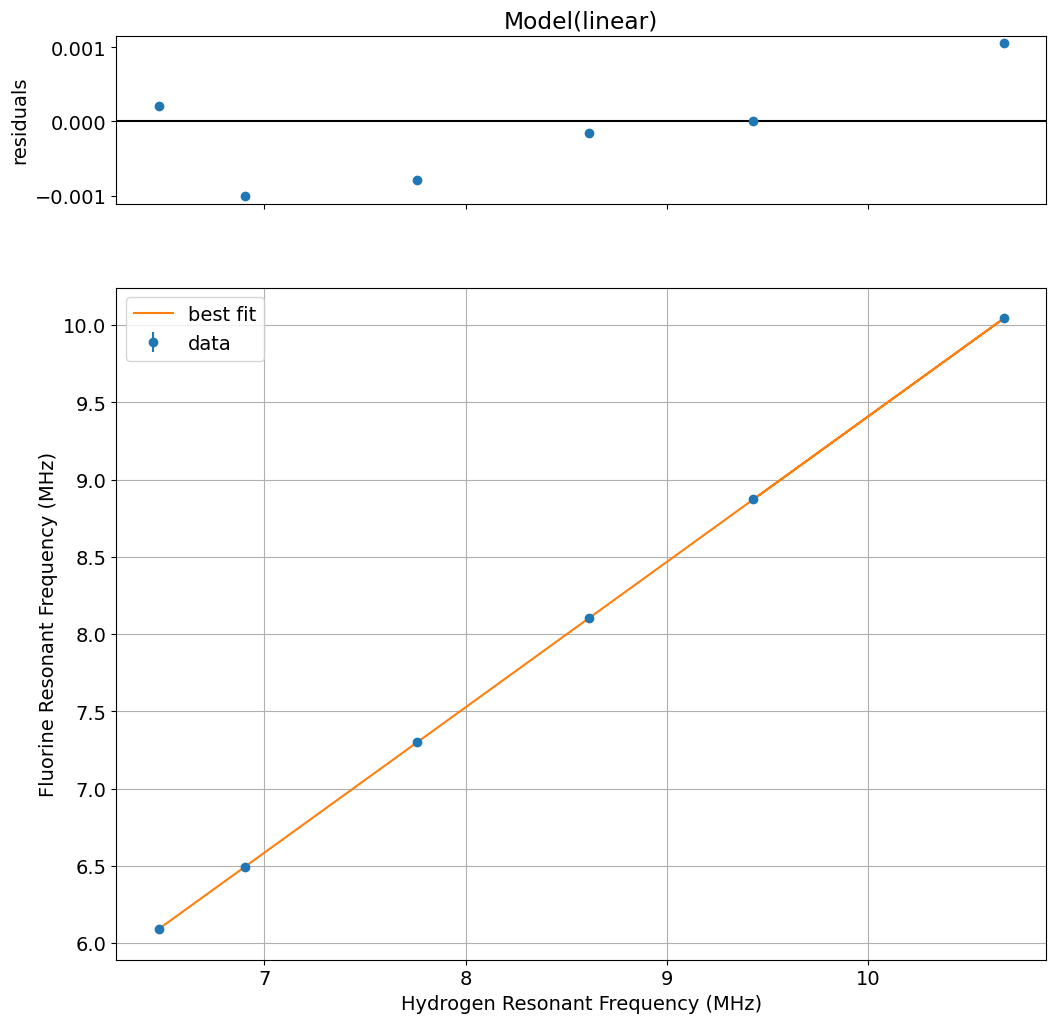

In [16]:
# Make a fit and plot of fluorine resonant frequency versus hydrogen resonant frequency.
start_params_3 = line.guess(Flfreq_avg, x = Hfreq_avg)

# Feed into line fit
Line_fit_3 = line.fit(Flfreq_avg, start_params_3, x = Hfreq_avg, 
                      weights = 1/(Flfreq_std*Hfreq_std))

Line_fit_3.plot()
plt.grid(True)
plt.xlabel('Hydrogen Resonant Frequency (MHz)')
plt.ylabel('Fluorine Resonant Frequency (MHz)')

### Use the result

Obtain the slope with uncertainty and with the result calculate a value for $\gamma_F$ and the <sup>19</sup>F $g$-factor. 

In [63]:
# You code this

F_slope = unc.ufloat(Line_fit_3.params['slope'].value,
                     Line_fit_3.params['slope'].stderr)
F_gamma = gamma_p * F_slope
print('gamma for fluorine: {:.2uP} rad/s/T'.format(F_gamma))

gamma for fluorine: (2.52363±0.00076)×10⁸ rad/s/T


In [66]:
g_factor_f = (2*const.proton_mass / const.elementary_charge) * F_gamma

print("g-factor for Fluorine: {: .2uP}".format(g_factor_f))
print("Known proton g-factor:", const.value("proton g factor"))

g-factor for Fluorine:  5.2692±0.0016
Known proton g-factor: 5.5856946893


## Trend of $T_2^*$ as a function of paramagnetic ion concentration

From the scope screen images, extract estimates of the relaxation time $T_2^*$ as a function of concentration of the copper sulfate ions.  

Plot these on a plot with double-log axes.  To change the axis type of a plot use the functions

    plt.xscale('log')
    plt.yscale('log')
    
You should see a trend that the relaxation time gets a bit longer and then levels out as the concentration is decreased.

In [57]:
# You code this
nmr4_data = pd.read_csv('Continuous NMR Data - Exercise 4.csv')
print(nmr4_data)

   Bo (kG) Conc. Ratio  Freq (MHz)  Time Const. (us)
0    2.194         1/2      9.4327              85.0
1    2.194         1/4      9.4323             105.0
2    2.194         1/8      9.4324              95.0
3    2.194        1/16      9.4315              98.0
4    2.194        1/32      9.4306             118.0
5    2.194        1/64      9.4317             118.0
6    2.194       water      9.4322               NaN


In [58]:
#Adjusting ratios to integers
ratios_array = []
for i in range(1,7):
    temp_array = []
    temp_array.append(1/(2**i))
    ratios_array.append(temp_array)

ratios = np.array(ratios_array)
print(ratios_array)

t2 = nmr4_data.iloc[0:6,3]
print(t2)

[[0.5], [0.25], [0.125], [0.0625], [0.03125], [0.015625]]
0     85.0
1    105.0
2     95.0
3     98.0
4    118.0
5    118.0
Name: Time Const. (us), dtype: float64


Text(0, 0.5, 'T2 relaxation time (mus)')

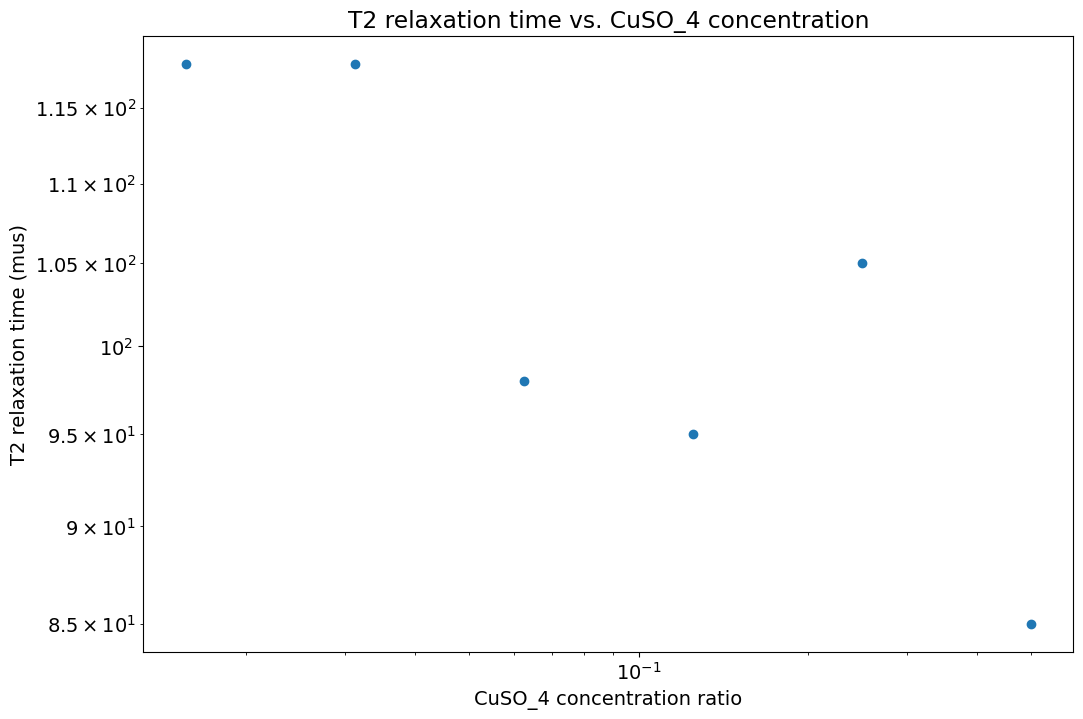

In [59]:
# Plotting graph
plt.errorbar(ratios, t2, fmt = 'o')
plt.xscale('log')
plt.yscale('log')
plt.title('T2 relaxation time vs. CuSO_4 concentration')
plt.xlabel('CuSO_4 concentration ratio')
plt.ylabel('T2 relaxation time (mus)')